## 1. Augmentacja

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

cifar_trainset = CIFAR10(root='./data', train=True, download=False)
data = cifar_trainset.data / 255

mean = data.mean(axis=(0, 1, 2))
std = data.std(axis=(0, 1, 2))

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

## 2, 3 - przypięcie augmentacji, załadowanie cifar-10

In [ ]:

train_dataset = CIFAR10(root='./data', train=True,
                        transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64,
                          shuffle=True, num_workers=4)

test_dataset = CIFAR10(root='./data', train=False,
                       transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64,
                         shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


## 4, 5 - Patching

In [ ]:
import torch


def image_to_patches(images, patch_size):
    batch_size, channels, height, width = images.size()
    assert height % patch_size == 0 and width % patch_size == 0, "Image size must be divisible by patch size"

    patches = images.unfold(2, patch_size, patch_size).unfold(
        3, patch_size, patch_size)
    patches = patches.contiguous().view(
        batch_size, channels, -1, patch_size, patch_size)
    # (batch_size, num_patches, channels, patch_size, patch_size)
    patches = patches.permute(0, 2, 1, 3, 4)
    return patches

In [7]:
data_iter = iter(train_loader)
images, _ = next(data_iter)
patches = image_to_patches(images, patch_size=4)

In [8]:
import matplotlib.pyplot as plt

data_iter = iter(train_loader)
images, _ = next(data_iter)
patches = image_to_patches(images, patch_size=4)

In [10]:

def visualize_patches(img):
    fig, axs = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axs.flatten()):
        patch = img[i].permute(1, 2, 0)
        ax.imshow((patch * torch.tensor(std) + torch.tensor(mean)).numpy())
        ax.axis('off')
    plt.show()

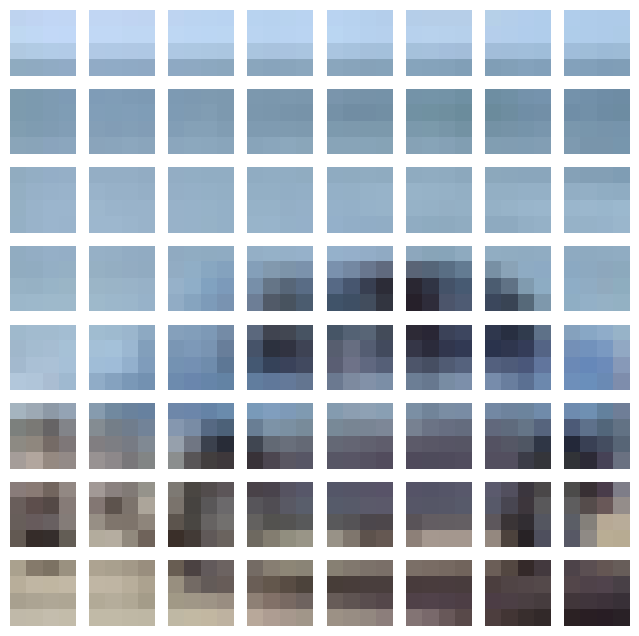

In [11]:
visualize_patches(patches[5])